# 03 - Interactive Viz

## Deadline

Wednesday November 8th, 2017 at 11:59PM

## Important Notes

- Make sure you push on GitHub your Notebook with all the cells already evaluated
- Note that maps do not render in a standard Github environment : you should export them to HTML and link them in your notebook.
- Remember that `.csv` is not the only data format. Though they might require additional processing, some formats provide better encoding support.
- Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you plan to implement!
- Please write all your comments in English, and use meaningful variable names in your code

## Background

In this homework we will be exploring interactive visualization, which is a key ingredient of many successful data visualizations (especially when it comes to infographics).

Unemployment rates are major economic metrics and a matter of concern for governments around the world. Though its definition may seem straightforward at first glance (usually defined as the number of unemployed people divided by the active population), it can be tricky to define consistently. For example, one must define what exactly unemployed means : looking for a job ? Having declared their unemployment ? Currently without a job ? Should students or recent graduates be included ? We could also wonder what the active population is : everyone in an age category (e.g. `16-64`) ? Anyone interested by finding a job ? Though these questions may seem subtle, they can have a large impact on the interpretation of the results : `3%` unemployment doesn't mean much if we don't know who is included in this percentage. 

In this homework you will be dealing with two different datasets from the statistics offices of the European commission ([eurostat](http://ec.europa.eu/eurostat/data/database)) and the Swiss Confederation ([amstat](https://www.amstat.ch)). They provide a variety of datasets with plenty of information on many different statistics and demographics at their respective scales. Unfortunately, as is often the case is data analysis, these websites are not always straightforward to navigate. They may include a lot of obscure categories, not always be translated into your native language, have strange link structures, â€¦ Navigating this complexity is part of a data scientists' job : you will have to use a few tricks to get the right data for this homework.

For the visualization part, install [Folium](https://github.com/python-visualization/folium) (*HINT*: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!). Folium's `README` comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find two `.topojson` files, containing the geo-coordinates of 

- European countries (*liberal definition of EU*) (`topojson/europe.topojson.json`, [source](https://github.com/leakyMirror/map-of-europe))
- Swiss cantons (`topojson/ch-cantons.topojson.json`) 

These will be used as an overlay on the Folium maps.

## Assignment

1. Go to the [eurostat](http://ec.europa.eu/eurostat/data/database) website and try to find a dataset that includes the european unemployment rates at a recent date.

   Use this data to build a [Choropleth map](https://en.wikipedia.org/wiki/Choropleth_map) which shows the unemployment rate in Europe at a country level. Think about [the colors you use](https://carto.com/academy/courses/intermediate-design/choose-colors-1/), how you decided to [split the intervals into data classes](http://gisgeography.com/choropleth-maps-data-classification/) or which interactions you could add in order to make the visualization intuitive and expressive. Compare Switzerland's unemployment rate to that of the rest of Europe.

2. Go to the [amstat](https://www.amstat.ch) website to find a dataset that includes the unemployment rates in Switzerland at a recent date.

   > *HINT* Go to the `details` tab to find the raw data you need. If you do not speak French, German or Italian, think of using free translation services to navigate your way through. 

   Use this data to build another Choropleth map, this time showing the unemployment rate at the level of swiss cantons. Again, try to make the map as expressive as possible, and comment on the trends you observe.

   The Swiss Confederation defines the rates you have just plotted as the number of people looking for a job divided by the size of the active population (scaled by 100). This is surely a valid choice, but as we discussed one could argue for a different categorization.

   Copy the map you have just created, but this time don't count in your statistics people who already have a job and are looking for a new one. How do your observations change ? You can repeat this with different choices of categories to see how selecting different metrics can lead to different interpretations of the same data.

3. Use the [amstat](https://www.amstat.ch) website again to find a dataset that includes the unemployment rates in Switzerland at recent date, this time making a distinction between *Swiss* and *foreign* workers.

   The Economic Secretary (SECO) releases [a monthly report](https://www.seco.admin.ch/seco/fr/home/Arbeit/Arbeitslosenversicherung/arbeitslosenzahlen.html) on the state of the employment market. In the latest report (September 2017), it is noted that there is a discrepancy between the unemployment rates for *foreign* (`5.1%`) and *Swiss* (`2.2%`) workers. 

   Show the difference in unemployment rates between the two categories in each canton on a Choropleth map (*hint* The easy way is to show two separate maps, but can you think of something better ?). Where are the differences most visible ? Why do you think that is ?

   Now let's refine the analysis by adding the differences between age groups. As you may have guessed it is nearly impossible to plot so many variables on a map. Make a bar plot, which is a better suited visualization tool for this type of multivariate data.

4. *BONUS*: using the map you have just built, and the geographical information contained in it, could you give a *rough estimate* of the difference in unemployment rates between the areas divided by the [RÃ¶stigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben)?


## Preliminary work

In [1]:
#Import libraries
import os
import pandas as pd
import json
import folium
import numpy as np
%matplotlib inline

# Task 1 : Europe unemployment

In task 1 by unemployment we considered the people currently without work during the reference week, and available to start work within the next two weeks (more info  [here](http://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:Unemployment)).



Beginning by reading the .tsv data into a DataFrame

In [2]:
urate_eur_month = r'une_rt_m.tsv'

urate_eur_month_df = pd.read_table(urate_eur_month)
urate_eur_month_df.head(3)

,"s_adj,age,unit,sex,geo\time",2017M09,2017M08,2017M07,2017M06,2017M05,2017M04,2017M03,2017M02,2017M01,...,1983M10,1983M09,1983M08,1983M07,1983M06,1983M05,1983M04,1983M03,1983M02,1983M01
0,"NSA,TOTAL,PC_ACT,F,AT",:,5.2,4.4,4.9,5.1,4.7,5.4,4.9,5.3,...,:,:,:,:,:,:,:,:,:,:
1,"NSA,TOTAL,PC_ACT,F,BE",:,7.7,7.6,6.8,6.9,7.4,8.0,8.2,7.8 b,...,:,:,:,:,:,:,:,:,:,:
2,"NSA,TOTAL,PC_ACT,F,BG",:,5.3,5.3,5.3,5.6,6.2,6.8,7.1,7.0,...,:,:,:,:,:,:,:,:,:,:


For the composition of our map, we only choose a fraction of the unemployment rate data: the country names with their respective unemployment values for the month of June 2017. 
The data is seasonally averaged, exprimed in percentage of the active population (float).

In [3]:
europe_rate = urate_eur_month_df[urate_eur_month_df['s_adj,age,unit,sex,geo\\time'].str.startswith('SA,TOTAL,PC_ACT,T')]
europe_rate = europe_rate[['s_adj,age,unit,sex,geo\\time','2017M06 ']]
europe_rate.columns = ['Code','Rate']
europe_rate['Rate']= europe_rate['Rate'].astype(float)

Cleaning the names :

In [4]:
def clean_code(cname):
    cname = cname.replace('SA,TOTAL,PC_ACT,T,','')
    return cname    

In [5]:
europe_rate['Code'] = europe_rate['Code'].map(clean_code)

In [6]:
europe_rate = europe_rate.reset_index(drop=True)[['Code','Rate']]

In [7]:
#interesting_data.to_csv('EU_countries_2017_06.csv',encoding='UTF-8',index=False)

Now we filter the country data, eliminating the useless countries :

In [8]:
filter_eur= europe_rate['Code'].str.startswith(('EU','EA','US','JP')).map(lambda x : not x)
europe_rate = europe_rate[filter_eur]
europe_rate.head()

,Code,Rate
0,AT,5.3
1,BE,7.2
2,BG,6.2
3,CY,10.9
4,CZ,2.9


We load here the geojson file

In [9]:
europe_countries_path = r'./geojson/europe.geojson.json'
geo_json_europe = json.load(open(europe_countries_path))

Before starting with the Europe map, we will just render the full names of the countries on our Dataframe. To proceed, we are helped by the glossary of the country codes on eurostat website : http://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:Country_codes

In [10]:

#We create a map from the ISO2 to the full country names 
full_countries_mapper = {geo_json_europe['features'][i]['properties']['ISO2'] : geo_json_europe['features'][i]['properties']['NAME'] for i in range(len(geo_json_europe['features']))}


#Handeling special cases
full_countries_mapper["EL"] = "Greece"
full_countries_mapper["UK"] = "United Kingdom"

europe_rate['Country'] = europe_rate['Code'].map(lambda c : full_countries_mapper[c])
europe_rate.head()

,Code,Rate,Country
0,AT,5.3,Austria
1,BE,7.2,Belgium
2,BG,6.2,Bulgaria
3,CY,10.9,Cyprus
4,CZ,2.9,Czech Republic


We choosed the city of Radom, Poland, as the center of our Europe map.

In [11]:
radom = [51.4172,21.1562]
europe = folium.Map(radom, tiles='cartodbpositron', zoom_start=4)

We can now define a Choropleth representation on the Europe map with the unemployment data obtained before.

In [12]:
europe.choropleth(
    geo_data=geo_json_europe,
    data=europe_rate,
    columns=['Country','Rate'],
    key_on='feature.properties.NAME',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percentage of active population that is unemployed (%)',
)

europe.save("Europe_Unemployement_rate.html")

The countries in the south of Europe hav more unemployement than the others. We also clearly see two outliers in Europe, namely Spain and Greece where the economy is pretty bad.

The countries from which we couldn't retrieve the data are in the lightest color of orange and are the following ones:

In [13]:
set(full_countries_mapper.values()) - set(europe_rate['Country'])

{'Albania',
 'Andorra',
 'Armenia',
 'Azerbaijan',
 'Belarus',
 'Bosnia and Herzegovina',
 'Faroe Islands',
 'Georgia',
 'Holy See (Vatican City)',
 'Israel',
 'Liechtenstein',
 'Monaco',
 'Montenegro',
 'Republic of Moldova',
 'Russia',
 'San Marino',
 'Serbia',
 'Switzerland',
 'The former Yugoslav Republic of Macedonia',
 'Ukraine'}

# Task 2 : Swiss unemployment


For the two following tasks, we considered unemployment as "taux de chômage" in [amstat](https://www.amstat.ch), meaning it only count the people that are unemployed, not the people that are working and also seeking for a job. This choice because we considered that it was more representative of the term unemployment. For us a job seeker is not an unemployed person

In [14]:
swiss_all_rate = pd.read_excel('un_rate_ch.xlsx')

Here is a dict that maps the cantons' names in french to their code

In [15]:
cantons_map = {
    'Zurich' : 'ZH',
    'Berne' : 'BE',
    'Lucerne' : 'LU',
    'Uri' : 'UR',
    'Schwyz' : 'SZ',
    'Obwald' : 'OW',
    'Nidwald' : 'NW',
    'Glaris' : 'GL',
    'Zoug' : 'ZG',
    'Fribourg' : 'FR',
    'Soleure' : 'SO',
    'Bâle-Ville' : 'BS',
    'Bâle-Campagne' : 'BL',
    'Schaffhouse' : 'SH',
    'Appenzell Rhodes-Extérieures' : 'AR',
    'Appenzell Rhodes-Intérieures' : 'AI',
    'St-Gall' : 'SG',
    'Grisons' : 'GR',
    'Argovie' : 'AG',
    'Thurgovie' : 'TG',
    'Tessin' : 'TI',
    'Vaud' : 'VD',
    'Valais': 'VS',
    'Neuchâtel' : 'NE',
    'Genève' : 'GE',
    'Jura' : 'JU'
}

In [16]:
swiss_all_rate = swiss_all_rate.iloc[:,[0,18]]
swiss_all_rate = swiss_all_rate.drop([0,1,2,29])
swiss_all_rate = swiss_all_rate.reset_index(drop=True)
swiss_all_rate.columns = ['Canton','Rate']
swiss_all_rate['Rate'] = swiss_all_rate['Rate'].astype(float)
swiss_all_rate['Code'] = swiss_all_rate['Canton'].map(lambda c : cantons_map[c])
swiss_all_rate.head()

,Canton,Rate,Code
0,Zurich,3.3,ZH
1,Berne,2.4,BE
2,Lucerne,1.7,LU
3,Uri,0.6,UR
4,Schwyz,1.7,SZ


In [17]:
swiss_cantons_path = r'./topojson/ch-cantons.topojson.json'
swiss_cantons_topo = json.load(open(swiss_cantons_path))

Creating the Switzerland map

In [18]:
ch = [46.8, 8.3]
switzerland_all = folium.Map(ch, tiles='cartodbpositron', zoom_start=8)

In [19]:
switzerland_all.choropleth(
    geo_data=swiss_cantons_topo,
    data=swiss_all_rate,
    columns=['Code','Rate'],
    key_on='id',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percentage of active population that is unemployed (%)',
    topojson='objects.cantons'
)
switzerland_all.save("Switerland_Unemployment_rate.html")

We see that the unemployment rate is higher for french speaking part of Switzerland, most cantons that are west of the Röstigraben have an rate of at least 3.7%

In [20]:
#to save
#map_osm.save('/tmp/map.html')

# Task 3: Swiss vs. foreigners

We get the data that we download in amstat website, 

In [21]:
swiss_by_nat_path = 'taux_chomage_nationalite.xlsx'
swiss_by_nat_rate = pd.read_excel(swiss_by_nat_path, header=0)[0:-1]

Putting the code for each canton (Geneve -> GE, Vaud -> VD, ...)

In [22]:
swiss_by_nat_rate['Code'] = swiss_by_nat_rate['Canton'].map(lambda c: cantons_map[c])

Getting two dataframes, one for each kind of nationality

In [23]:
swiss_by_nat_rate_gb = swiss_by_nat_rate.groupby(by=['Nationalité'])
foreigners_rate = swiss_by_nat_rate_gb.get_group('Etrangers')
swiss_rate = swiss_by_nat_rate_gb.get_group('Suisses')

In [24]:
switzerland_foreigners = folium.Map(ch, tiles='cartodbpositron', zoom_start=8)
switzerland_swiss = folium.Map(ch, tiles='cartodbpositron', zoom_start=8)

We want to use the same scale for both maps, so that we can compare them. Therefore we create this list which goes from the minimum value of the swiss rate, and the maximum value of the foreigners rate.

In [25]:
scale = list(np.linspace(swiss_rate['Taux de chômage'].min(), foreigners_rate['Taux de chômage'].max(), 6))

In [26]:
switzerland_foreigners.choropleth(
    geo_data=swiss_cantons_topo,
    data=foreigners_rate,
    columns=['Code', 'Taux de chômage'],
    key_on='id',    
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percentage of foreign population that is unemployed (%)',
    threshold_scale=scale,
    topojson='objects.cantons'
)

switzerland_foreigners.save("Switzerland_foreigners_Unemployment_rate.html")

In [27]:
switzerland_swiss.choropleth(
    geo_data=swiss_cantons_topo,
    data=swiss_rate,
    columns=['Code', 'Taux de chômage'],
    key_on='id',    
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percentage of swiss population that is unemployed (%)',
    threshold_scale=scale,
    topojson='objects.cantons'
)

switzerland_swiss#.save("Switzerland_swiss_Unemployment_rate.html")

From both of the two maps, we can conclude that the german part of switzerland has a better ratio regarding both the foreigners and the swiss.



However, we reckon that it's not very easy to compare the two maps. Therefore, we decided to show the data into another shape. Bellow, we plot for each canton two bars representing in blue the ratio of unemployment foreigners and in orange the swiss one.

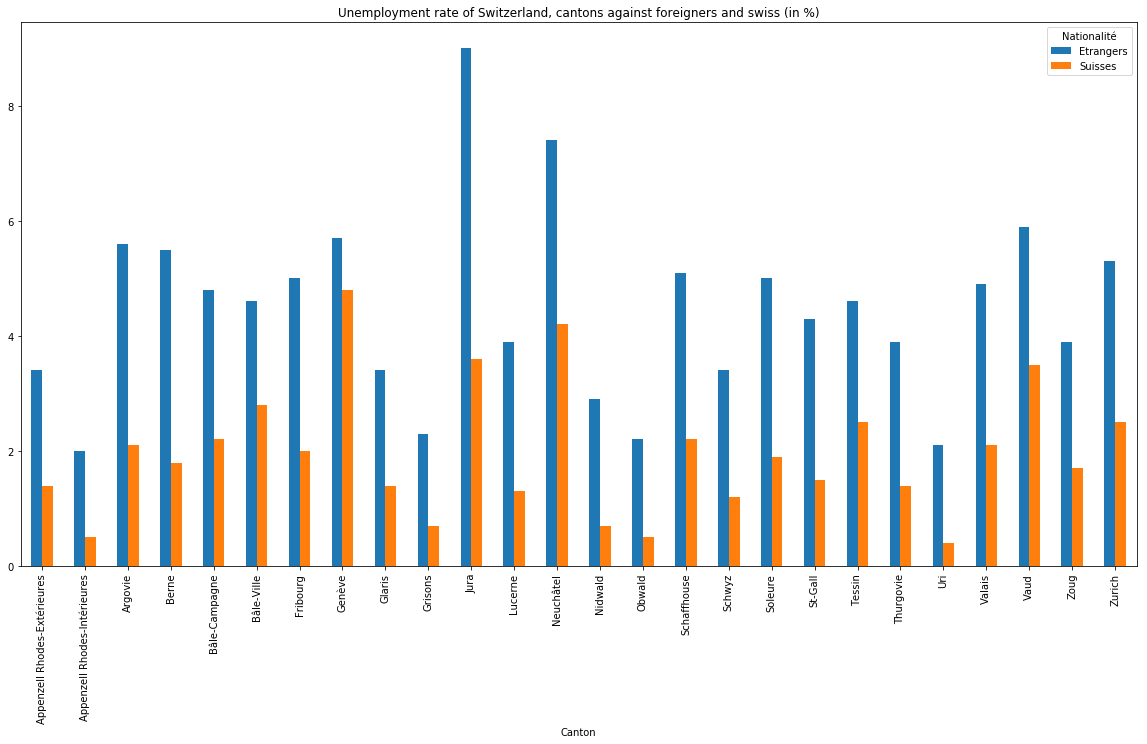

In [28]:
swiss_by_nat_rate.pivot(index="Canton", columns="Nationalité", values="Taux de chômage").plot.bar(figsize=(20, 10), title = "Unemployment rate of Switzerland, cantons against foreigners and swiss (in %)")

The advantage here is that, even though we loose the geographical feeling, we can easily see that there is no canton for which the unemployement rate is lower for foreigners. We can also clearly see the extrem cases: Genva's canton is quite fair whereas Jura is less well-balanced.

Based on what we just said about Jura and Geneva, we found interessting to compare the proportion between foreigners and swiss people. To be simple, which canton would be the "fairest" in therms of hiring foreigners. Here, to keep the geographical feeling, we show the result on a choropleth map

In [29]:
rate_compare = swiss_rate.reset_index()[["Canton","Code"]]
rate_compare["compare"] = foreigners_rate.reset_index()['Taux de chômage'] / (swiss_rate.reset_index()['Taux de chômage']+ foreigners_rate.reset_index()['Taux de chômage'])

In [30]:
switzerland_compare = folium.Map(ch, tiles='cartodbpositron', zoom_start=8)

switzerland_compare.choropleth(
    geo_data=swiss_cantons_topo,
    data=rate_compare,
    columns=['Code', 'compare'],
    key_on='id',    
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='factor between the rates of unemployed foreigners and swiss ',
    topojson='objects.cantons'
)

switzerland_compare.save("Switzerland_compare.html")

This is clearly a new point of view, indeed now inner canton (Uri, Obwald, Nidwald, etc... ) are shown in darker shade of red which means the foreigners have higher unemployement rate compare to the overall unemployement in that canton

As above, we selected on [amstat](https://www.amstat.ch), the unemployement level but this time by selecting the age classes. 

In [31]:
unemp_swiss_age = pd.read_excel("./taux_chomage_age.xlsx", names=["cantons","ages","unemployement_rate"])
unemp_swiss_age = unemp_swiss_age.pivot(index="cantons", columns="ages", values="unemployement_rate")

In [32]:
unemp_swiss_age.head(3)

ages,15-24 ans,25-49 ans,50 ans et plus
cantons,,,
Appenzell Rhodes-Extérieures,1.5,1.7,1.8
Appenzell Rhodes-Intérieures,1.0,0.5,0.9
Argovie,3.3,3.0,2.7


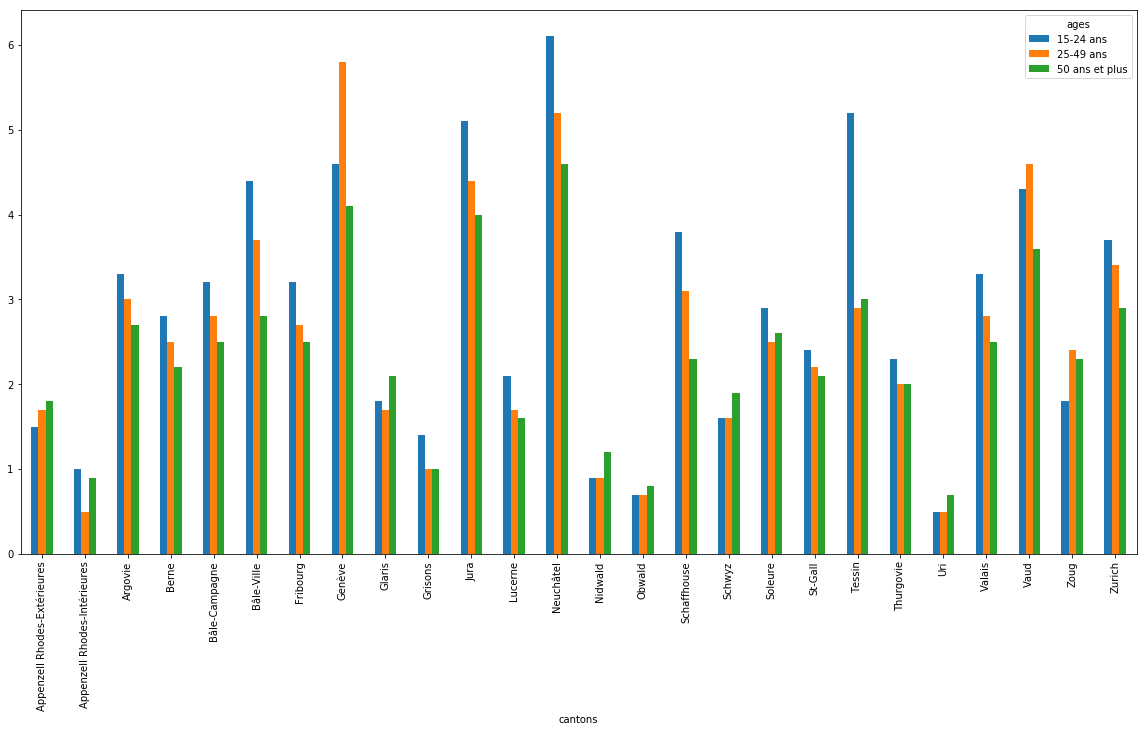

In [33]:
unemp_swiss_age.plot.bar(figsize=(20, 10))

We see that on average the older the better. However, we can see some atypical cases: Geneva's canton has a higher rate for people of 25-49 years old; Appenzell Rhodes Extérieures has a totally reversed rate.